In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
from sklearn.preprocessing import StandardScaler

In [155]:
df = pd.read_csv("train_sessions.csv")



In [156]:
df.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [157]:
df.isna().sum()

session_id        0
site1             0
time1             0
site2          3463
time2          3463
site3          6642
time3          6642
site4          9240
time4          9240
site5         11732
time5         11732
site6         14066
time6         14066
site7         16264
time7         16264
site8         18337
time8         18337
site9         20477
time9         20477
site10        22509
time10        22509
target            0
dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  253561 non-null  int64  
 1   site1       253561 non-null  int64  
 2   time1       253561 non-null  object 
 3   site2       250098 non-null  float64
 4   time2       250098 non-null  object 
 5   site3       246919 non-null  float64
 6   time3       246919 non-null  object 
 7   site4       244321 non-null  float64
 8   time4       244321 non-null  object 
 9   site5       241829 non-null  float64
 10  time5       241829 non-null  object 
 11  site6       239495 non-null  float64
 12  time6       239495 non-null  object 
 13  site7       237297 non-null  float64
 14  time7       237297 non-null  object 
 15  site8       235224 non-null  float64
 16  time8       235224 non-null  object 
 17  site9       233084 non-null  float64
 18  time9       233084 non-null  object 
 19  si

In [159]:
df.describe()

,session_id,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target
count,253561.00000,253561.000000,250098.000000,246919.000000,244321.000000,241829.000000,239495.000000,237297.000000,235224.000000,233084.000000,231052.000000,253561.000000
mean,126781.00000,3243.550144,3272.400883,3303.987757,3325.109422,3343.406035,3352.312637,3395.546771,3430.157765,3438.400088,3460.388861,0.009059
std,73196.90014,7247.006212,7307.480404,7347.809918,7371.245606,7379.758550,7380.413775,7435.727671,7473.417900,7471.062652,7492.447548,0.094747
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,63391.00000,53.000000,53.000000,53.000000,52.000000,52.000000,52.000000,55.000000,55.000000,55.000000,55.000000,0.000000
50%,126781.00000,677.000000,677.000000,677.000000,677.000000,678.000000,679.000000,679.000000,704.000000,733.000000,733.000000,0.000000
75%,190171.00000,1980.000000,1980.000000,1986.500000,1995.000000,2054.000000,2077.000000,2197.000000,2287.000000,2366.000000,2403.000000,0.000000
max,253561.00000,41601.000000,41600.000000,41599.000000,41599.000000,41599.000000,41600.000000,41600.000000,41601.000000,41601.000000,41601.000000,1.000000


In [160]:
df['target'].unique()

array([0, 1])

<Axes: ylabel='count'>

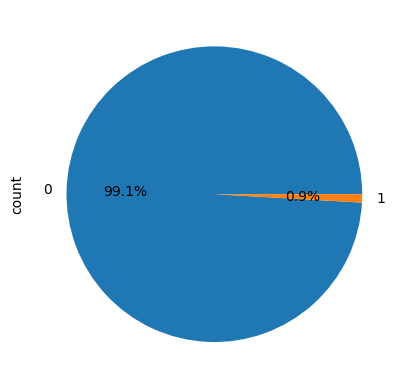

In [161]:
df['target'].value_counts().plot(kind='pie' , autopct='%1.1f%%')

In [162]:
df['target'].value_counts()

target
0    251264
1      2297
Name: count, dtype: int64

In [163]:
df.fillna(0, inplace=True)

In [164]:
df['time1'].dtypes

dtype('O')

In [165]:
time_cols = sorted([col for col in df.columns if col.startswith('time')])
df[time_cols] = df[time_cols].apply(pd.to_datetime, errors='coerce')

for i in range(len(time_cols)-1):
    col1 = time_cols[i]
    col2 = time_cols[i+1] 
    diff_col = f'diff{col1}_{col2}'

    df[diff_col] = (df[col2]-df[col1]).dt.total_seconds()

In [166]:
df.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,target,difftime1_time10,difftime10_time2,difftime2_time3,difftime3_time4,difftime4_time5,difftime5_time6,difftime6_time7,difftime7_time8,difftime8_time9
0,1,718,2014-02-20 10:02:45,0.0,1970-01-01 00:00:00,0.0,1970-01-01 00:00:00,0.0,1970-01-01 00:00:00,0.0,...,0,-1.392891e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,0,2.600000e+01,-26.0,1.0,0.0,0.0,0.0,1.0,0.0,23.0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,0,7.000000e+00,-6.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,0,2.700000e+02,-240.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,0,2.460000e+02,-109.0,0.0,1.0,0.0,36.0,0.0,0.0,67.0


In [167]:
df.dtypes

session_id                   int64
site1                        int64
time1               datetime64[ns]
site2                      float64
time2               datetime64[ns]
site3                      float64
time3               datetime64[ns]
site4                      float64
time4               datetime64[ns]
site5                      float64
time5               datetime64[ns]
site6                      float64
time6               datetime64[ns]
site7                      float64
time7               datetime64[ns]
site8                      float64
time8               datetime64[ns]
site9                      float64
time9               datetime64[ns]
site10                     float64
time10              datetime64[ns]
target                       int64
difftime1_time10           float64
difftime10_time2           float64
difftime2_time3            float64
difftime3_time4            float64
difftime4_time5            float64
difftime5_time6            float64
difftime6_time7     

In [168]:
for i in range(len(time_cols)):
        col = time_cols[i]
        df[f'year_{col}'] = df[col].dt.year
        df[f'month_{col}'] = df[col].dt.month
        df[f'day_{col}'] = df[col].dt.day
        df[f'hour_{col}'] = df[col].dt.hour
        df[f'minute_{col}'] = df[col].dt.minute
        df[f'second_{col}'] = df[col].dt.second
        df[f'weekday_{col}'] = df[col].dt.dayofweek
        df = df.drop(col, axis=1)

In [169]:
df = pd.get_dummies(df)

In [170]:
df.isna().sum()

session_id       0
site1            0
site2            0
site3            0
site4            0
                ..
day_time9        0
hour_time9       0
minute_time9     0
second_time9     0
weekday_time9    0
Length: 91, dtype: int64

In [171]:
# def create_tcn_model(input_shape):
#     model = models.Sequential()

#     model.add(tf.keras.Input(shape=input_shape))

#     model.add(layers.Conv1D(64, kernel_size=3, dilation_rate=1, padding='causal', activation='relu'))
#     model.add(layers.Dropout(0.3))

#     model.add(layers.Conv1D(128, kernel_size=3, dilation_rate=2, padding='causal', activation='relu'))
#     model.add(layers.Dropout(0.3))

#     model.add(layers.Conv1D(256, kernel_size=3, dilation_rate=4, padding='causal', activation='relu'))
#     model.add(layers.Dropout(0.3))

#     model.add(layers.GlobalAveragePooling1D())
#     model.add(layers.Dense(1, activation='sigmoid')) 

#     model.compile(
#         optimizer='adam',
#         loss='binary_crossentropy',  
#         metrics=[
#             'accuracy',
#             AUC(name='roc_auc', curve='ROC')  
#         ]
#     )

#     return model


from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.metrics import AUC
import tensorflow as tf

def residual_block(x, filters, kernel_size, dilation_rate, dropout_rate):
    prev_x = x

    x = layers.Conv1D(filters, kernel_size, dilation_rate=dilation_rate, 
                      padding='causal', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.SpatialDropout1D(dropout_rate)(x)

    x = layers.Conv1D(filters, kernel_size, dilation_rate=dilation_rate, 
                      padding='causal', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    
    if prev_x.shape[-1] != x.shape[-1]:
        prev_x = layers.Conv1D(filters, kernel_size=1, padding='same')(prev_x)

    x = layers.Add()([x, prev_x])
    x = layers.ReLU()(x)
    return x

def create__better_tcn_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs

    for i, dilation_rate in enumerate([1, 2, 4, 8, 16]):
        x = residual_block(x, filters=64, kernel_size=3, dilation_rate=dilation_rate, dropout_rate=0.2)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            AUC(name='roc_auc', curve='ROC')
        ]
    )
    return model


In [172]:
scaler =  StandardScaler()

In [173]:
X = df.drop(columns='target')
y =df['target']

In [174]:
X_scaled = scaler.fit_transform(X)

In [175]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [176]:
X_train = X_train.reshape((-1, 90, 1))
X_val = X_val.reshape((-1, 90, 1)) 

In [177]:
input_shape = (X_train.shape[1], 1)

In [178]:
features_columns = X.columns

In [179]:
features_columns

Index(['session_id', 'site1', 'site2', 'site3', 'site4', 'site5', 'site6',
       'site7', 'site8', 'site9', 'site10', 'difftime1_time10',
       'difftime10_time2', 'difftime2_time3', 'difftime3_time4',
       'difftime4_time5', 'difftime5_time6', 'difftime6_time7',
       'difftime7_time8', 'difftime8_time9', 'year_time1', 'month_time1',
       'day_time1', 'hour_time1', 'minute_time1', 'second_time1',
       'weekday_time1', 'year_time10', 'month_time10', 'day_time10',
       'hour_time10', 'minute_time10', 'second_time10', 'weekday_time10',
       'year_time2', 'month_time2', 'day_time2', 'hour_time2', 'minute_time2',
       'second_time2', 'weekday_time2', 'year_time3', 'month_time3',
       'day_time3', 'hour_time3', 'minute_time3', 'second_time3',
       'weekday_time3', 'year_time4', 'month_time4', 'day_time4', 'hour_time4',
       'minute_time4', 'second_time4', 'weekday_time4', 'year_time5',
       'month_time5', 'day_time5', 'hour_time5', 'minute_time5',
       'second_time5

In [180]:
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# fold_accuracies = []
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
#     print(f"\nTraining fold {fold+1}...")

#     X_train_fold = df.iloc[train_idx][features_columns]
#     X_val_fold = df.iloc[val_idx][features_columns]
#     y_train_fold = df.iloc[train_idx]['target']
#     y_val_fold = df.iloc[val_idx]['target']


#     model = create_tcn_model(input_shape)
#     model.fit(
#         X_train_fold, y_train_fold, 
#         epochs=20, 
#         batch_size=32, 
#         validation_data=(X_val_fold, y_val_fold),
#         callbacks=[early_stopping],
#         verbose=1
#     )

#     val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold)
#     fold_accuracies.append(val_acc)
#     print(f"Validation accuracy for fold {fold+1}: {val_acc:.4f}")

# print(f"\nCross-validation results: {fold_accuracies}")
# print(f"Mean accuracy: {np.mean(fold_accuracies):.4f}")

In [181]:


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = create__better_tcn_model(input_shape)

model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

val_acc = model.evaluate(X_val, y_val)

Epoch 1/20
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 184s 113ms/step - accuracy: 0.9644 - loss: 0.1764 - roc_auc: 0.5789 - val_accuracy: 0.9910 - val_loss: 0.0931 - val_roc_auc: 0.8173
Epoch 2/20
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 178s 112ms/step - accuracy: 0.9910 - loss: 0.0934 - roc_auc: 0.7671 - val_accuracy: 0.9910 - val_loss: 0.0806 - val_roc_auc: 0.8648
Epoch 3/20
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 179s 113ms/step - accuracy: 0.9908 - loss: 0.0822 - roc_auc: 0.8265 - val_accuracy: 0.9910 - val_loss: 0.0705 - val_roc_auc: 0.8906
Epoch 4/20
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 203s 128ms/step - accuracy: 0.9908 - loss: 0.0745 - roc_auc: 0.8441 - val_accuracy: 0.9910 - val_loss: 0.0644 - val_roc_auc: 0.9101
Epoch 5/20
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 173s 109ms/step - accuracy: 0.9910 - loss: 0.0672 - roc_auc: 0.8752 - val_accuracy: 0.9911 - val_loss: 0.0601 - val_roc_auc: 0.9150
Epoch 6/20
1585/1585 ━━━━━━━━━━━━━━━━━━━━ 181s 114ms/step - accuracy: 0.9911 - loss: 0.0629 - roc_auc: 0.8829 - val_accuracy: 0.99

In [182]:
model.save("alice.h5")

In [183]:
dfTest =  pd.read_csv("test_sessions.csv")

In [184]:
dfTest.fillna(0, inplace=True)

In [185]:
time_cols = sorted([col for col in dfTest.columns if col.startswith('time')])
dfTest[time_cols] = dfTest[time_cols].apply(pd.to_datetime, errors='coerce')

for i in range(len(time_cols)-1):
    col1 = time_cols[i]
    col2 = time_cols[i+1] 
    diff_col = f'diff{col1}_{col2}'

    dfTest[diff_col] = (dfTest[col2]-dfTest[col1]).dt.total_seconds()

In [186]:
dfTest.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time10,difftime1_time10,difftime10_time2,difftime2_time3,difftime3_time4,difftime4_time5,difftime5_time6,difftime6_time7,difftime7_time8,difftime8_time9
0,1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,...,2014-10-04 11:20:00,7.0,-7.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
1,2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,...,2014-07-03 11:01:53,85.0,-60.0,5.0,8.0,3.0,1.0,13.0,6.0,1.0
2,3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,...,2014-12-05 15:56:36,84.0,-83.0,1.0,61.0,1.0,1.0,1.0,1.0,14.0
3,4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,...,2014-11-04 10:03:23,4.0,-4.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,...,2014-05-16 15:05:44,13.0,-12.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0


In [187]:
dfTest.isna().sum()

session_id             0
site1                  0
time1                  0
site2                  0
time2               1489
site3                  0
time3               2722
site4                  0
time4               3615
site5                  0
time5               4456
site6                  0
time6               5231
site7                  0
time7               5957
site8                  0
time8               6646
site9                  0
time9               7313
site10                 0
time10              7991
difftime1_time10    7991
difftime10_time2    7991
difftime2_time3     2722
difftime3_time4     3615
difftime4_time5     4456
difftime5_time6     5231
difftime6_time7     5957
difftime7_time8     6646
difftime8_time9     7313
dtype: int64

In [188]:
for i in range(len(time_cols)):
        col = time_cols[i]
        dfTest[f'year_{col}'] = dfTest[col].dt.year
        dfTest[f'month_{col}'] = dfTest[col].dt.month
        dfTest[f'day_{col}'] = dfTest[col].dt.day
        dfTest[f'hour_{col}'] = dfTest[col].dt.hour
        dfTest[f'minute_{col}'] = dfTest[col].dt.minute
        dfTest[f'second_{col}'] = dfTest[col].dt.second
        dfTest[f'weekday_{col}'] = dfTest[col].dt.dayofweek
        dfTest = dfTest.drop(col, axis=1)

In [189]:
ans = dfTest.copy()

In [198]:
sampleDf =  pd.read_csv("sample_submission.csv")

In [199]:
sampleDf.drop(columns="target" , axis=1)

,session_id
0,1
1,2
2,3
3,4
4,5
...,...
82792,82793
82793,82794
82794,82795
82795,82796


In [190]:
type(ans)

pandas.core.frame.DataFrame

In [191]:
ans = scaler.fit_transform(ans)

In [192]:
type(ans)

numpy.ndarray

In [193]:
preds = model.predict(dfTest)
ans = pd.DataFrame({'target': preds.flatten()})


2588/2588 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step


In [200]:
ans.index.name = 'session_id'
ans.index = ans.index + 1



In [201]:
ans

,target
session_id,
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
...,...
82793,0.479713
82794,0.000000
82795,0.000000


In [202]:
ans.to_csv("ans.csv")